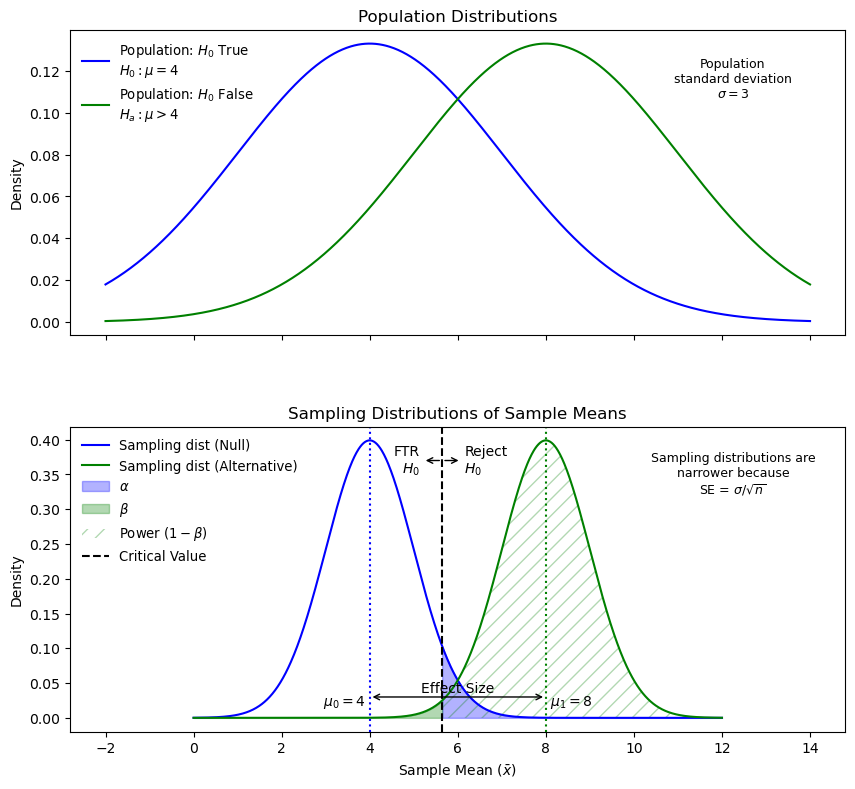

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
mu0 = 4
mu1 = 8
sigma = 3
n = 9
se = sigma / np.sqrt(n)

# Distributions
x_pop = np.linspace(-2, 14, 1000)
x_samp = np.linspace(0, 12, 1000)
pop_null = norm(mu0, sigma)
pop_alt = norm(mu1, sigma)
samp_null = norm(mu0, se)
samp_alt = norm(mu1, se)

# Critical value for one-sided test
alpha = 0.05
crit_val = norm.ppf(1 - alpha, mu0, se)

# Plot
fig, axs = plt.subplots(2, 1, figsize=(10, 9), sharex=True, gridspec_kw={'height_ratios': [1, 1]})

# --- Top Panel: Population Distributions ---
axs[0].plot(x_pop, pop_null.pdf(x_pop), color='blue', label='Population: $H_0$ True\n$H_0: \mu = 4$')
axs[0].plot(x_pop, pop_alt.pdf(x_pop), color='green', label='Population: $H_0$ False\n$H_a: \mu > 4$')
# axs[0].text(mu0, pop_null.pdf(mu0) + 0.005, '$H_0$', ha='center', color='blue')
# axs[0].text(mu1, pop_alt.pdf(mu1) + 0.005, '$H_a$', ha='center', color='green')
axs[0].set_ylabel("Density")
axs[0].set_title("Population Distributions")
axs[0].legend(loc='upper left', fontsize=9.5, frameon=False)
axs[0].grid(False)

# Text box in top left
axs[0].text(12.25, 0.1,
            'Population\nstandard deviation\n$\sigma = 3$\n',
            ha='center', fontsize=9,
            bbox=dict(boxstyle='round,pad=0.4', facecolor='white', edgecolor='white'))


# --- Bottom Panel: Sampling Distributions ---
axs[1].plot(x_samp, samp_null.pdf(x_samp), color='blue', label='Sampling dist (Null)')
axs[1].plot(x_samp, samp_alt.pdf(x_samp), color='green', label='Sampling dist (Alternative)')

# Shade alpha
x_alpha = np.linspace(crit_val, x_samp[-1], 200)
axs[1].fill_between(x_alpha, 0, samp_null.pdf(x_alpha), color='blue', alpha=0.3, label=r'$\alpha$')

# Shade beta
x_beta = np.linspace(x_samp[0], crit_val, 200)
axs[1].fill_between(x_beta, 0, samp_alt.pdf(x_beta), color='green', alpha=0.3, label=r'$\beta$')

# Shade power
x_power = np.linspace(crit_val, x_samp[-1], 200)
axs[1].fill_between(x_power, 0, samp_alt.pdf(x_power),
                    facecolor='none', edgecolor='green', hatch='//', linewidth=0.0, alpha=0.3,
                    label=r'Power ($1 - \beta$)')

# Critical value line
axs[1].axvline(crit_val, color='black', linestyle='--', label='Critical Value')
axs[1].axvline(mu0, color='blue', linestyle=':') #, label='$\mu_0 = 4$')
axs[1].axvline(mu1, color='green', linestyle=':') #, label='$\mu_1 = 8$')

# Horizontal arrows for rejection/FTR regions
axs[1].annotate('Reject\n$H_0$', xy=(crit_val, 0.37), xytext=(crit_val + 0.5, 0.37),
                arrowprops=dict(arrowstyle='<-', color='black'), fontsize=10, ha='left', va='center')
axs[1].annotate('FTR\n$H_0$', xy=(crit_val, 0.37), xytext=(crit_val - 0.5, 0.37),
                arrowprops=dict(arrowstyle='<-', color='black'), fontsize=10, ha='right', va='center')

# Mean labels UNDER the axis
axs[1].text(mu0-.1, 0.035, '$\mu_0 = 4$', ha='right', va='top')
axs[1].text(mu1+.1, 0.035, '$\mu_1 = 8$', ha='left', va='top')

# Effect size
axs[1].annotate('', xy=(mu0, 0.03), xytext=(mu1, 0.03),
                arrowprops=dict(arrowstyle='<->', color='black'))
axs[1].text((mu0 + mu1)/2, 0.032, 'Effect Size', ha='center', va='bottom', fontsize=10)

# Text box in top left
axs[1].text(12.25, 0.3,
            'Sampling distributions are\nnarrower because\nSE = $\sigma / \sqrt{n}$\n',
            ha='center', fontsize=9,
            bbox=dict(boxstyle='round,pad=0.4', facecolor='white', edgecolor='white'))

# Formatting
axs[1].set_xlabel("Sample Mean ($\\bar{x}$)")
# axs[1].set_ylim(-0.05, 0.4)
axs[1].set_ylabel("Density")
axs[1].set_title("Sampling Distributions of Sample Means")
axs[1].legend(loc='upper left', fontsize=9.5, frameon=False)
axs[1].grid(False)

# Layout
plt.subplots_adjust(hspace=0.3, bottom=0.1)
plt.show()


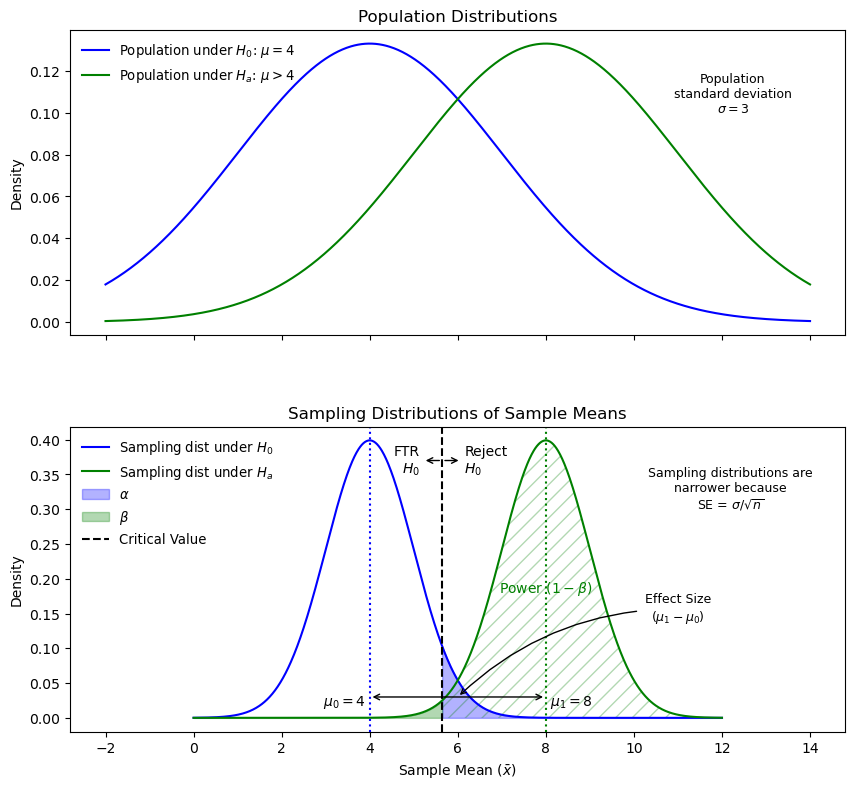

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
mu0 = 4
mu1 = 8
sigma = 3
n = 9
se = sigma / np.sqrt(n)

# Distributions
x_pop = np.linspace(-2, 14, 1000)
x_samp = np.linspace(0, 12, 1000)
pop_null = norm(mu0, sigma)
pop_alt = norm(mu1, sigma)
samp_null = norm(mu0, se)
samp_alt = norm(mu1, se)

# Critical value for one-sided test
alpha = 0.05
crit_val = norm.ppf(1 - alpha, mu0, se)

# Plot
fig, axs = plt.subplots(2, 1, figsize=(10, 9), sharex=True, gridspec_kw={'height_ratios': [1, 1]})

# --- Top Panel: Population Distributions ---
axs[0].plot(x_pop, pop_null.pdf(x_pop), color='blue', label='Population under $H_0$: $\\mu = 4$')
axs[0].plot(x_pop, pop_alt.pdf(x_pop), color='green', label='Population under $H_a$: $\\mu > 4$')
axs[0].set_ylabel("Density")
axs[0].set_title("Population Distributions")
axs[0].legend(loc='upper left', fontsize=9.5, frameon=False)
axs[0].grid(False)

# Text box in top right
axs[0].text(12.25, 0.1,
            'Population\nstandard deviation\n$\\sigma = 3$',
            ha='center', fontsize=9,
            bbox=dict(boxstyle='round,pad=0.4', facecolor='white', edgecolor='white'))

# --- Bottom Panel: Sampling Distributions ---
axs[1].plot(x_samp, samp_null.pdf(x_samp), color='blue', label='Sampling dist under $H_0$')
axs[1].plot(x_samp, samp_alt.pdf(x_samp), color='green', label='Sampling dist under $H_a$')

# Shade alpha
x_alpha = np.linspace(crit_val, x_samp[-1], 200)
axs[1].fill_between(x_alpha, 0, samp_null.pdf(x_alpha), color='blue', alpha=0.3, label=r'$\alpha$')

# Shade beta
x_beta = np.linspace(x_samp[0], crit_val, 200)
axs[1].fill_between(x_beta, 0, samp_alt.pdf(x_beta), color='green', alpha=0.3, label=r'$\beta$')

# Shade power
x_power = np.linspace(crit_val, x_samp[-1], 200)
axs[1].fill_between(x_power, 0, samp_alt.pdf(x_power),
                    facecolor='none', edgecolor='green', hatch='//', linewidth=0.0, alpha=0.3)

# Label Power directly
axs[1].text(crit_val + 1.3, 0.18, r'Power $(1 - \beta)$', color='green', fontsize=10)

# Critical value line
axs[1].axvline(crit_val, color='black', linestyle='--', alpha=1, label='Critical Value')
axs[1].axvline(mu0, color='blue', linestyle=':')
axs[1].axvline(mu1, color='green', linestyle=':')

# Horizontal arrows for rejection/FTR regions
arrowprops = dict(arrowstyle='<-', color='black', mutation_scale=10)
axs[1].annotate('Reject\n$H_0$', xy=(crit_val, 0.37), xytext=(crit_val + 0.5, 0.37),
                arrowprops=arrowprops, fontsize=10, ha='left', va='center')
axs[1].annotate('FTR\n$H_0$', xy=(crit_val, 0.37), xytext=(crit_val - 0.5, 0.37),
                arrowprops=arrowprops, fontsize=10, ha='right', va='center')

# Mean labels UNDER the axis
axs[1].text(mu0 - 0.1, 0.035, '$\\mu_0 = 4$', ha='right', va='top')
axs[1].text(mu1 + 0.1, 0.035, '$\\mu_1 = 8$', ha='left', va='top')

# Effect size arrow
axs[1].annotate('', xy=(mu0, 0.03), xytext=(mu1, 0.03),
                arrowprops=dict(arrowstyle='<->', color='black'))
# # Effect size label
# axs[1].text((mu0 + mu1)/2, 0.032, 'Effect Size\n$(\\mu_1 - \\mu_0)$', ha='center', va='bottom', fontsize=10, color='darkred')

# # Effect size label with background box
# axs[1].text((mu0 + mu1)/2, 0.025, 'Effect Size\n($\\mu_1 - \\mu_0$)',
#             ha='center', va='top', fontsize=10,
#             bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

# # Draw arrow line from midpoint to label
# axs[1].annotate('', 
#                 xy=((mu0 + mu1)/2, 0.03),     # Arrow points to midpoint
#                 xytext=(10.5, 0.15),           # Label location (adjust as needed)
#                 arrowprops=dict(arrowstyle='->', color='black'))

# # Add label text box in white space
# axs[1].text(10.5, 0.15, 'Effect Size\n($\\mu_1 - \\mu_0$)', 
#             ha='center', va='bottom', fontsize=9,
#             bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.4'))

# Text box in top left
axs[1].text(12.2, 0.3,
            'Sampling distributions are\nnarrower because\nSE = $\\sigma / \\sqrt{n}$',
            ha='center', fontsize=9,
            bbox=dict(boxstyle='round,pad=0.4', facecolor='white', edgecolor='white'))

axs[1].annotate('Effect Size\n($\\mu_1 - \\mu_0$)', 
    xy=((mu0 + mu1)/2, 0.03), 
    xytext=(11, 0.18), 
    ha='center', va='top', fontsize=9,
    bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.4'),
    arrowprops=dict(arrowstyle='->', color='black', connectionstyle='arc3,rad=0.2'))

# Formatting
axs[1].set_xlabel("Sample Mean ($\\bar{x}$)")
axs[1].set_ylabel("Density")
axs[1].set_title("Sampling Distributions of Sample Means")
axs[1].legend(loc='upper left', fontsize=9.5, frameon=False, bbox_to_anchor=(0, 1))
axs[1].grid(False)

# Layout
plt.subplots_adjust(hspace=0.3, bottom=0.1)
plt.show()
